In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/train.csv')

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [ ]:
df.drop('Row ID', axis = 1, inplace = True)
df['Order Date'] = pd.to_datetime(df['Order Date'], format = '%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format = '%d/%m/%Y')

In [ ]:
df.sort_values(by = ['Order Date'], inplace = True, ascending = True)

In [ ]:
df.set_index('Order Date', inplace = True)

In [ ]:
print(df.isnull().sum())

Order ID          0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [ ]:
df[df['Postal Code'].isnull()]

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,,
2016-11-07,CA-2016-162887,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
2016-11-08,CA-2016-117086,2016-11-12,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",4404.90
2017-01-23,US-2017-165505,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
2017-01-23,US-2017-165505,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
2017-01-23,US-2017-165505,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
2017-04-06,US-2017-150140,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
2018-01-19,US-2018-127292,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
2018-01-19,US-2018-127292,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04
2018-01-19,US-2018-127292,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28


In [ ]:
df['Postal Code'] = df['Postal Code'].fillna(5401)

In [ ]:
print(df.isnull().sum())

Order ID         0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


In [ ]:
Top_customers = df.groupby(['Customer Name'])['Sales'].sum().sort_values(ascending = False).head(20)
Top_customers = Top_customers.round(2)
Top_customers = Top_customers.reset_index()

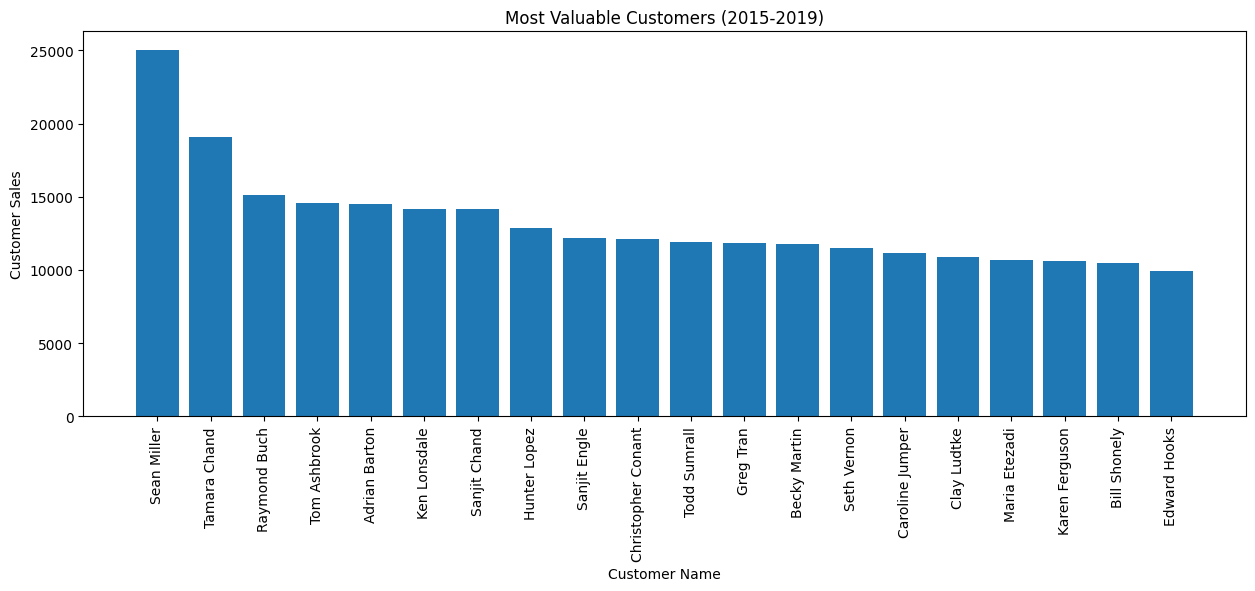

In [ ]:
plt.figure(figsize = (15, 5))
plt.title('Most Valuable Customers (2015-2019)')
plt.bar(Top_customers['Customer Name'],Top_customers['Sales'])
plt.xlabel('Customer Name')
plt.ylabel('Customer Sales')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
Top_states = df.groupby(['State'])['Sales'].sum().sort_values(ascending = False).head(20)
Top_states = Top_states.round(2).reset_index()


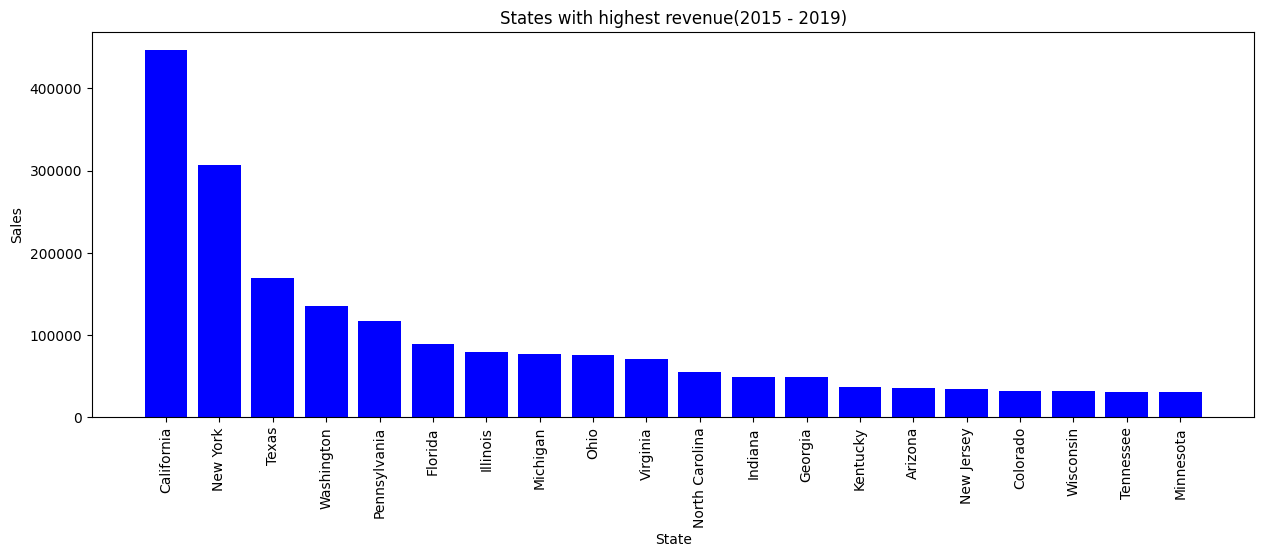

In [ ]:
plt.figure(figsize = (15, 5))
plt.title('States with highest revenue(2015 - 2019)')
plt.bar(Top_states['State'],Top_states['Sales'], color = 'b')
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
Top_cities = df.groupby(['City'])['Sales'].sum().sort_values(ascending = False).head(20)
Top_cities = Top_cities.round(2).reset_index()

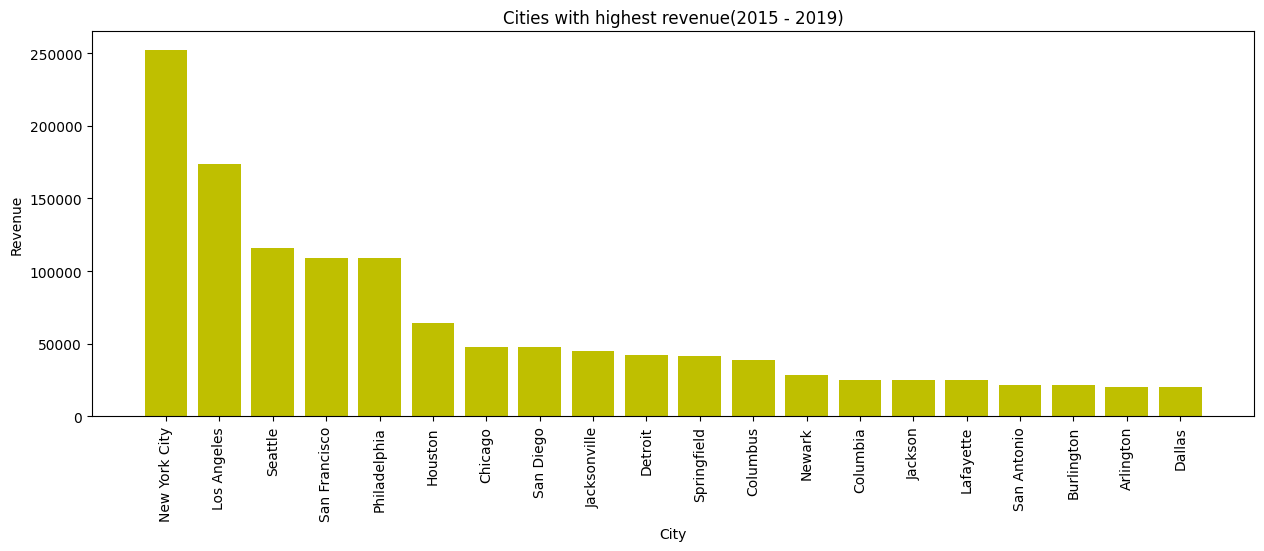

In [ ]:
plt.figure(figsize = (15 , 5))
plt.title('Cities with highest revenue(2015 - 2019)')
plt.bar(Top_cities['City'],Top_cities['Sales'], color = 'y')
plt.xlabel('City')
plt.ylabel('Revenue')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
Top_category = df.groupby(["Category"])["Sales"].sum().sort_values(ascending=False)
Top_category = Top_category.round(2).reset_index()
total_revenue_category = Top_category['Sales'].sum()

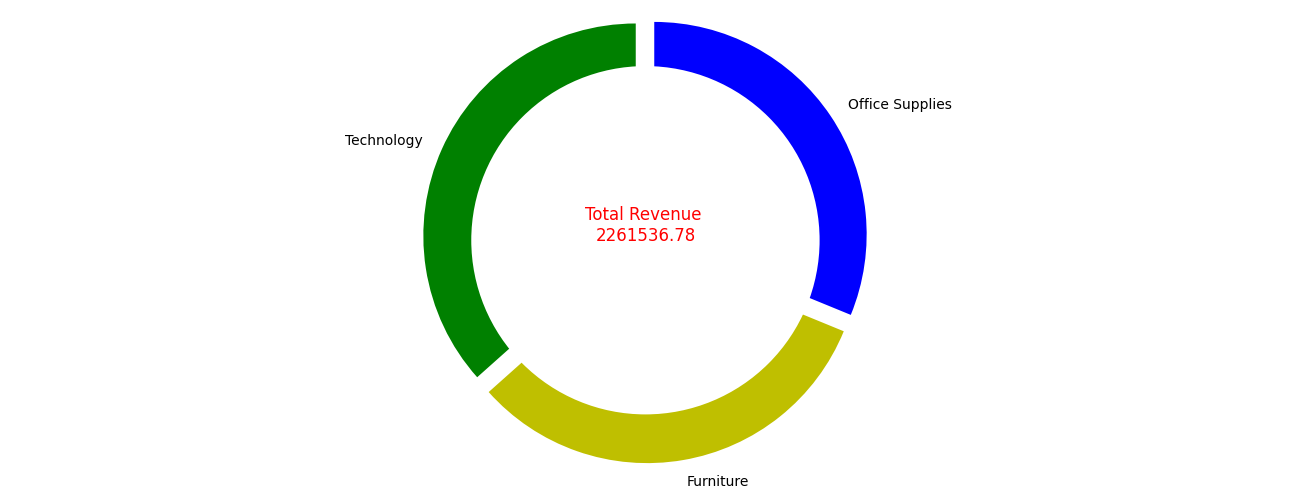

In [ ]:
plt.rcParams["figure.figsize"] = (13,5)
colors = ['g','y','b']
explode = (0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(Top_category['Sales'], colors = colors, labels=Top_category['Category'], startangle=90,explode=explode)
centre_circle = plt.Circle((0,0),0.82,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
label = ax1.annotate('Total Revenue \n'+str(total_revenue_category),color = 'red', xy=(0, 0), fontsize=12, ha="center")
plt.tight_layout()
plt.show()

In [ ]:
Top_products = df.groupby(["Product Name"])["Sales"].sum().sort_values(ascending=False).head(8)
Top_products = Top_products.reset_index().round(2)
total_revenue_products = Top_products["Sales"].sum()
total_revenue_products = str(int(total_revenue_products))
total_revenue_products = '$' + total_revenue_products

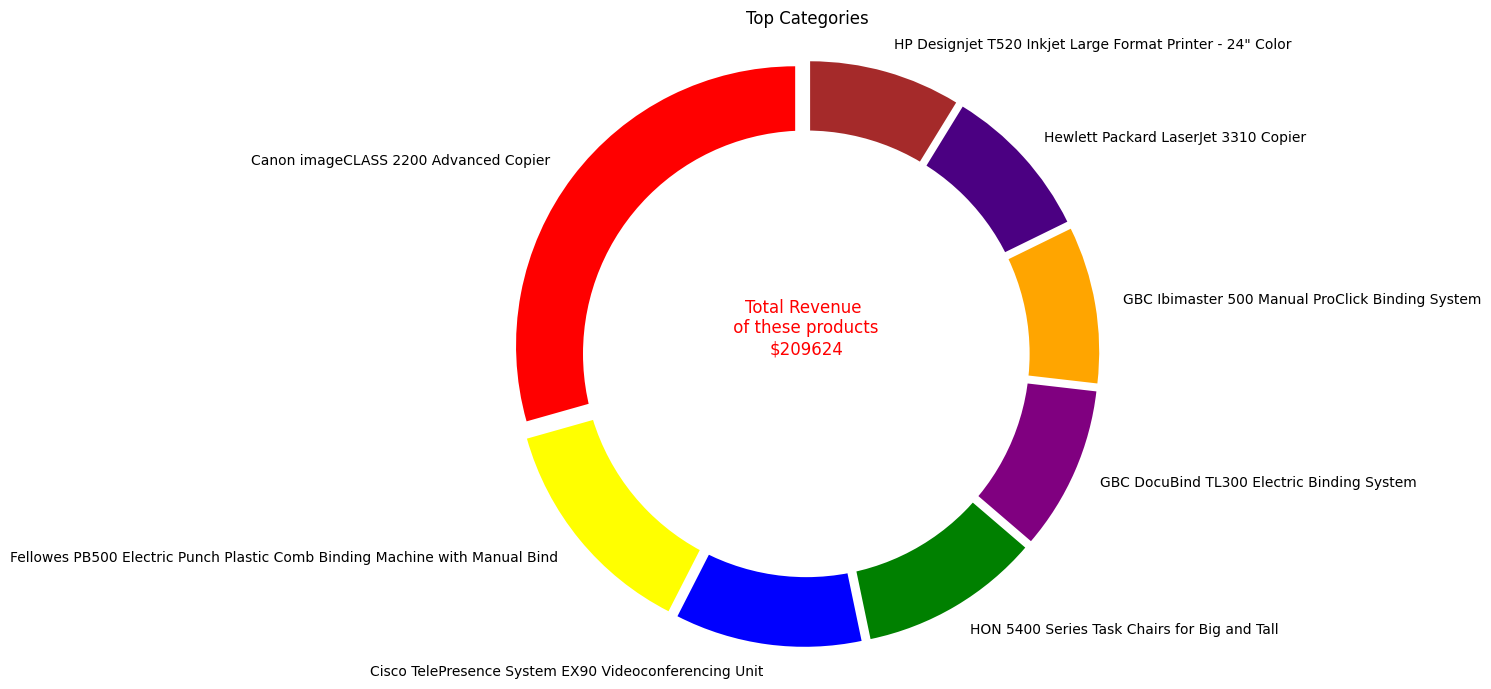

In [ ]:
plt.rcParams["figure.figsize"] = (13,7)
colors = ['red','yellow','blue','green','purple','orange','indigo','brown']
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(Top_products['Sales'], colors = colors, labels=Top_products['Product Name'],  startangle=90,explode=explode)
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
label = ax1.annotate('Total Revenue \n of these products \n'+str(total_revenue_products),color = 'red', xy=(0, 0), fontsize=12, ha="center")
plt.title('Top Categories')
plt.tight_layout()
plt.show()

In [ ]:
Top_subcat = df.groupby(['Category','Sub-Category'])["Sales"].sum().sort_values(ascending=False).head(10)
Top_subcat = Top_subcat.reset_index()
Top_subcat = Top_subcat[["Category", "Sub-Category", "Sales"]].astype({'Sales': int})
Top_subcat = Top_subcat.sort_values("Category")
Top_subcat_1 = Top_subcat.groupby(['Category'])["Sales"].sum()
Top_subcat_1 = Top_subcat_1.reset_index()

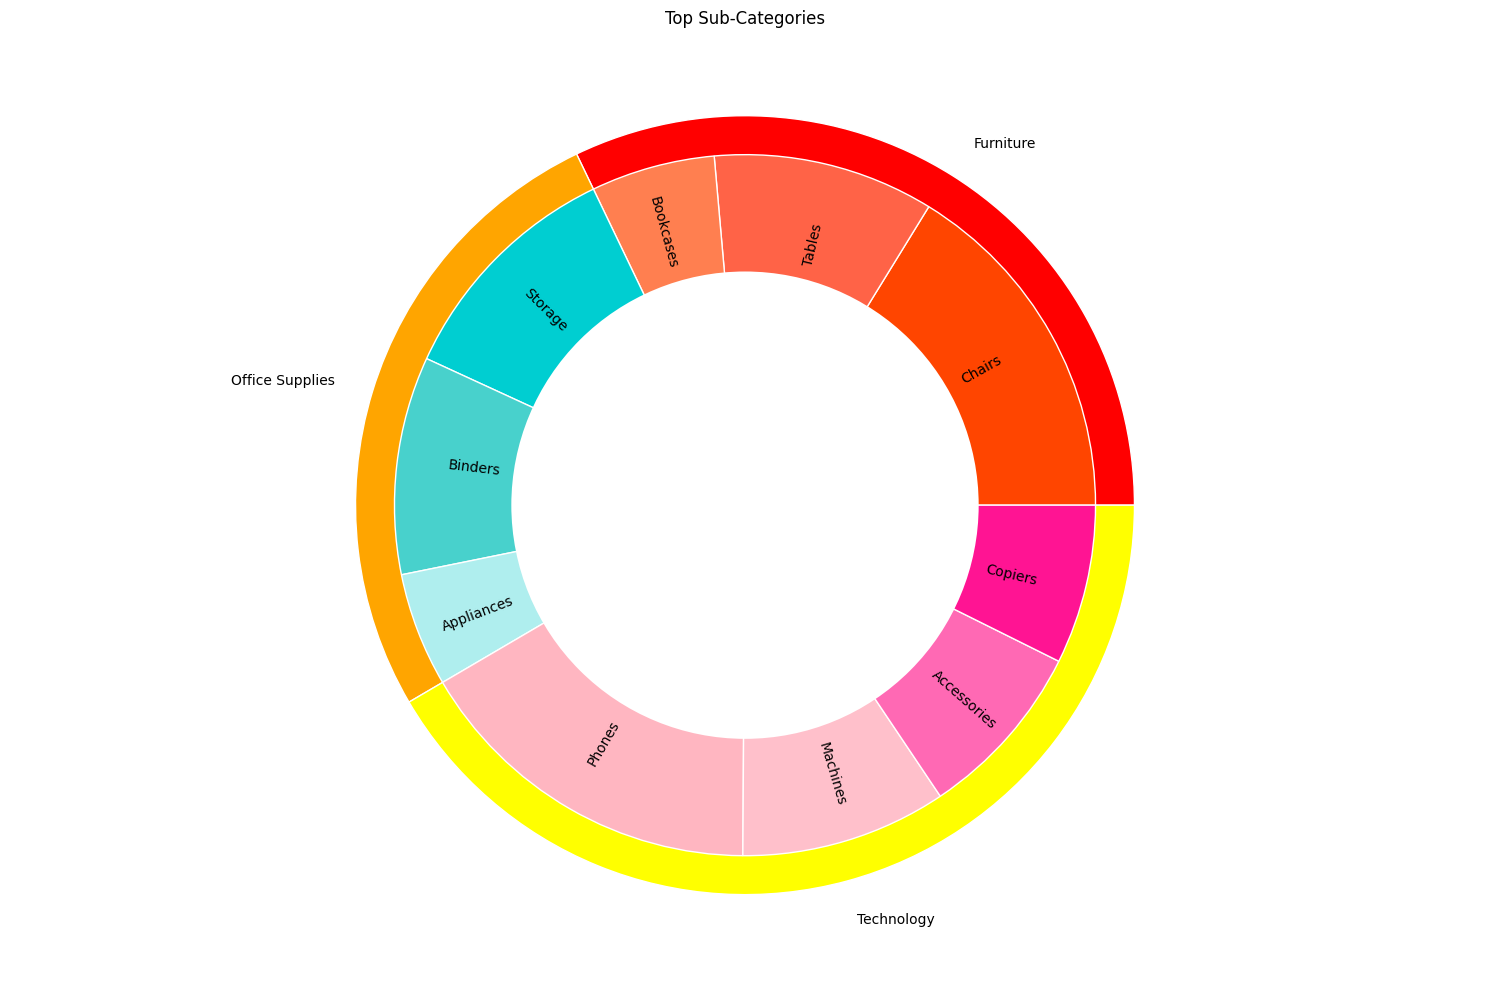

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots()
ax.axis('equal')
width = 0.1
outer_colors = ['red','orange','yellow']
inner_colors = ['Orangered','tomato','coral',"darkturquoise","mediumturquoise","paleturquoise","lightpink","pink","hotpink","deeppink"]
pie = ax.pie(Top_subcat_1['Sales'], radius=1, labels=Top_subcat_1['Category'],colors=outer_colors,wedgeprops=dict(edgecolor='w'))
pie2 = ax.pie(Top_subcat['Sales'], radius=1-width, labels=Top_subcat['Sub-Category'],colors=inner_colors,labeldistance=0.7,wedgeprops=dict(edgecolor='w'), pctdistance=0.53,rotatelabels =True)

centre_circle = plt.Circle((0,0),0.6,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
plt.title('Top Sub-Categories')
plt.tight_layout()
plt.show()

In [ ]:
state = ['Alabama', 'Arizona' ,'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
         'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
         'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana','Nebraska', 'Nevada', 'New Hampshire',
         'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
         'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
         'West Virginia', 'Wisconsin','Wyoming']
state_code = ['AL','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA',
              'MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN',
              'TX','UT','VT','VA','WA','WV','WI','WY']

In [ ]:
state_df = pd.DataFrame(state, state_code)
state_df.reset_index(level=0, inplace=True)
state_df.columns = ['State Code','State']

sales = df.groupby(["State"])["Sales"].sum().sort_values(ascending=False).reset_index()
sales = pd.merge(sales, state_df, on='State')
sales.drop('index', axis=1, inplace=True, errors='ignore')
sales.drop('Postal Code', axis=1, inplace=True, errors='ignore')

In [ ]:
import plotly.graph_objects as go

sales['text'] = sales['State']
fig = go.Figure(data=go.Choropleth(
    locations=sales['State Code'],
    text=sales['text'],
    z = sales['Sales'].astype(float),
    locationmode = 'USA-states',
    colorscale = 'Reds',
    colorbar_title = "Sales",

))

fig.update_layout(
    title_text = 'Sales',
    geo_scope='usa',
)

fig.show();